# A. Import Module

In [ ]:
# Mengimport modul - modul yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=1c517eb9fdb0a6416aed0be6750e676b2c65351b178df37fde59d5264b48017b
  Stored in directory: /root/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


In [ ]:
# Importing Modules untuk Notebook ini
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
import warnings; warnings.simplefilter('ignore')
import umap
import tau_unsup as tau
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)
random_state = 99

--2023-01-13 09:21:41--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py’

tau_unsup.py        100%[===================>]  16.98K  --.-KB/s    in 0.001s  

2023-01-13 09:21:42 (24.2 MB/s) - ‘tau_unsup.py’ saved [17387/17387]



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# B. Preprocessing

In [ ]:
!mkdir data #import data
!wget -P data/ https://raw.githubusercontent.com/Jauhar-Hakim571/Case-Study-02-Data-Mining/main/Case-Study-02-MixITup.csv
try:
    # Running Locally
    df = pd.read_csv('Case-Study-02-MixITup.csv')
except:
    # Running in Google Colab
    df = pd.read_csv('https://raw.githubusercontent.com/Jauhar-Hakim571/Case-Study-02-Data-Mining/main/Case-Study-02-MixITup.csv')

--2023-01-13 09:21:55--  https://raw.githubusercontent.com/Jauhar-Hakim571/Case-Study-02-Data-Mining/main/Case-Study-02-MixITup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10239 (10.0K) [text/plain]
Saving to: ‘data/Case-Study-02-MixITup.csv’

Case-Study-02-MixIT 100%[===================>]  10.00K  --.-KB/s    in 0s      

2023-01-13 09:21:55 (71.9 MB/s) - ‘data/Case-Study-02-MixITup.csv’ saved [10239/10239]



In [ ]:
df #cek dataset

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


In [ ]:
df.dropna(axis=0, inplace=True) #hapus missing values

In [ ]:
df.drop_duplicates(subset='ID', keep="first", inplace=True) #menghapus data duplikat dengan menggunakan subset ID sebagai patokkan data unique

In [ ]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


In [ ]:
df.info() #mengecek tipe-tipe data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    178 non-null    int64  
 1   Jenis Kelamin         178 non-null    object 
 2   Umur                  178 non-null    object 
 3   Pendapatan-per-bulan  178 non-null    object 
 4   skor-pengeluaran      178 non-null    int64  
 5   Menikah               178 non-null    object 
 6   Kota                  178 non-null    object 
 7   Promo                 178 non-null    float64
 8   HariFav               178 non-null    object 
 9   FavFlavor             178 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.3+ KB


Terdapat tipe data yang salah yaitu variabel Umur, Pendapatan-per-bulan, skor-pengeluaran yang seharusnya bertipe data numerik. Selain itu, variabel, jenis Kelamin, Menikah, Kota, Promo, HariFav, FavFlavor yang seharusnya bertipe data kategorik.

Sebelum itu kita akan mengecek semua unique variabel untuk mengecek apakah terdapat data yang noise atau tidak valid.

In [ ]:
df['Umur'].unique() #mengecek nilai unik variabel umur, terlihat ada yang memiliki tanda '

array(['49', '32', '51', '19', '38', '33', '27', '24', '21', '36', '46',
       '60', '58', '47', '45', '22', '18', '59', '44', '39', '35', '20',
       '30', '23', '48', '37', '40', '34', '41', '53', '54', '28', '55',
       '25', '50', '42', '29', '43', '52', '2', '31', '56', '26', '57'],
      dtype=object)

In [ ]:
df['Umur'] = df['Umur'].str.replace("'","")

In [ ]:
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace(',', '') #Akan dilakukan pengubahan format Pendapatan-per-bulan agar nanti dapat kita ubah menjadi numerik dengan menghapus koma, Rp, dan spasi
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', '')
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace(' ', '')
df['Umur'] = df['Umur'].str.replace(' ', '') #Akan dilakukan pengubahan format Umur agar nanti dapat kita ubah menjadi numerik dengan cara menghapus segala jenis spasi

In [ ]:
df['Umur']=df['Umur'].astype('float') #dilakukannya perubahan tipe data
df['Pendapatan-per-bulan']=df['Pendapatan-per-bulan'].astype('float')
df['FavFlavor']=df['FavFlavor'].astype('category')
df['Promo']=df['Promo'].astype('category')
df['HariFav']=df['HariFav'].astype('category')
df['Jenis Kelamin']=df['Jenis Kelamin'].astype('category')
df['Menikah']=df['Menikah'].astype('category')
df['Kota']=df['Kota'].astype('category')

In [ ]:
df.info() #Mengecek ulang hasil perubahan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    178 non-null    int64   
 1   Jenis Kelamin         178 non-null    category
 2   Umur                  178 non-null    float64 
 3   Pendapatan-per-bulan  178 non-null    float64 
 4   skor-pengeluaran      178 non-null    int64   
 5   Menikah               178 non-null    category
 6   Kota                  178 non-null    category
 7   Promo                 178 non-null    category
 8   HariFav               178 non-null    category
 9   FavFlavor             178 non-null    category
dtypes: category(6), float64(2), int64(2)
memory usage: 9.4 KB


In [ ]:
df['Kota'].unique() #mengecek semua data unik di Kota, terlihat bahwa terdapat tulisan JJakarta yang kita asumsi merupakan typo karena tulisannya terlalu dekat dengan "Jakarta" sehingga akan diubah menjadi Jakarta

['Jakarta', 'Depok', 'Tangerang', 'JJakarta']
Categories (4, object): ['Depok', 'JJakarta', 'Jakarta', 'Tangerang']

In [ ]:
df['Kota'] = df['Kota'].str.replace('JJakarta', 'Jakarta')

In [ ]:
df['Kota'].unique()

array(['Jakarta', 'Depok', 'Tangerang'], dtype=object)

In [ ]:
df['FavFlavor'].unique() #mengecek semua data unik di FavFlavor, terdapat nilai 9 yang merupakan tidak mungkin dikarenakan variabel ini hanya memiliki maksimal nilai 0-8 sehingga diasumsikan bahwa data tidak valid dan akan dihapus

[2, 6, 3, 7, 8, 0, 5, 4, 1, 9]
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [ ]:
df[df['FavFlavor'] == 9]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
130,231,Wanita,44.0,25819672.0,20,1,Tangerang,3.0,Sabtu,9


In [ ]:
df.drop([130],axis=0, inplace=True)

In [ ]:
df[df['FavFlavor'] == 9]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
df['Promo'].unique() #mengecek semua data unik di Promo, terdapat nilai 5 yang merupakan tidak mungkin dikarenakan variabel ini hanya memiliki maksimal nilai 0-3 sehingga diasumsikan bahwa data tidak valid dan akan dihapus

[1.0, 2.0, 0.0, 3.0, 5.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 5.0]

In [ ]:
df[df['Promo'] == 5]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
14,115,Wanita,58.0,2049180.0,15,1,Tangerang,5.0,Sabtu,8


In [ ]:
df.drop([14],axis=0, inplace=True)

In [ ]:
df[df['Promo'] == 5]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
df['Jenis Kelamin'].unique() #mengecek semua data unik di Jenis Kelamin, terdapat - yang merupakan tidak mungkin sehingga dianggap bahwa data tersebut incomplete dan tidak valid karena kita sebagai data analyst tidak mungkin menebak jenis kelamin asli pelanggan sehingga akan dihapus

['Wanita', 'Pria', '-']
Categories (3, object): ['-', 'Pria', 'Wanita']

In [ ]:
df[df['Jenis Kelamin'] == '-']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
185,286,-,21.0,0.0,81,0,Depok,1.0,Jumat,0


In [ ]:
df.drop([185],axis=0, inplace=True)

In [ ]:
df[df['Jenis Kelamin'] == '-']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
df['Menikah'].unique() #mengecek semua data unik di Menikah, terdapat - yang merupakan tidak mungkin sehingga dianggap bahwa data tersebut incomplete dan tidak valid karena kita sebagai data analyst tidak mungkin menebak status pernikahan pelanggan sehingga akan dihapus

['1', '0', '-']
Categories (3, object): ['-', '0', '1']

In [ ]:
df[df['Menikah'] == '-']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
180,281,Pria,50.0,28688524.0,26,-,Tangerang,3.0,Minggu,4


In [ ]:
df.drop([180],axis=0, inplace=True)
df[df['Menikah'] == '-']

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
df['Umur'].unique() #mengecek semua data unik di Umur, terdapat nilai 2 yang setelah diteliti lebih lanjut merupakan data tidak valid dikarenakan kita memiliki asumsi bahwa tidak mungkin anak 2 tahun memiliki pengeluaran sebesar 18jt dan memiliki orang tua waras yang memperbolehkan dia memakan es krim

array([49., 32., 51., 19., 38., 33., 27., 24., 21., 36., 46., 60., 47.,
       45., 22., 18., 59., 44., 39., 35., 20., 30., 23., 48., 37., 40.,
       34., 41., 53., 54., 28., 55., 25., 50., 42., 58., 29., 43., 52.,
        2., 31., 56., 26., 57.])

In [ ]:
df[df['Umur'] == 2]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
119,220,Pria,2.0,18032786.0,41,0,Jakarta,2.0,Senin,0


In [ ]:
df.drop([119],axis=0, inplace=True)
df[df['Umur'] == 2]

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor


In [ ]:
df.drop("ID", axis=1, inplace=True) #kita sekarang karena telah menggunakan kolom ID untuk mengecek semua unique value maka tidak memerlukannya lagi untuk menganalisa data sehingga akan di drop saja
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49.0,13114754.0,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32.0,33606557.0,86,1,Depok,1.0,Minggu,6
2,Pria,51.0,15983606.0,41,1,Jakarta,2.0,Minggu,3
3,Pria,19.0,12704918.0,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38.0,20081967.0,42,1,Jakarta,2.0,Senin,8


# C. EDA

### Hari Favorit

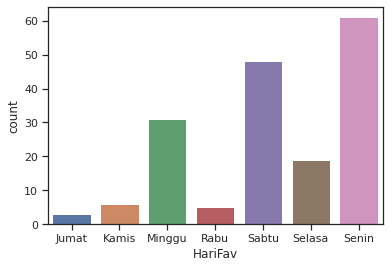

In [ ]:
sns.countplot(x="HariFav", data=df)

### Rasa ice cream dan hari favorit

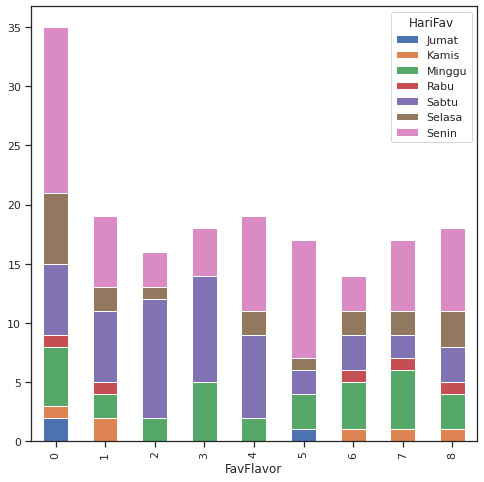

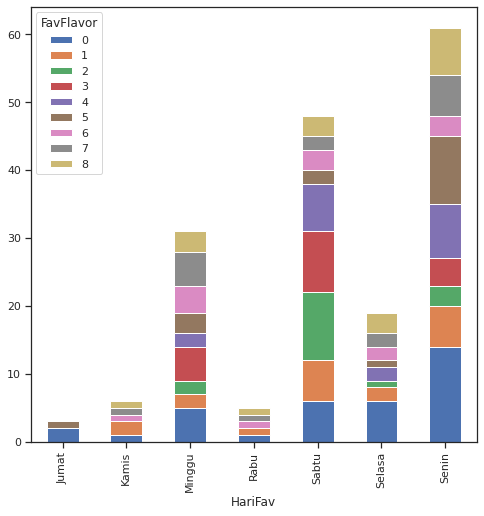

In [ ]:
CT=pd.crosstab(index=df["FavFlavor"], columns=df["HariFav"])
CT.plot(kind="bar", figsize=(8,8), stacked=True)

CT=pd.crosstab(index=df["HariFav"], columns=df["FavFlavor"])
CT.plot(kind="bar", figsize=(8,8), stacked=True)

Dari hasil visualisasi berikut, dapat terlihat bahwa hari paling sering pelanggan menggunakan kartu loyaliti program adalah pada hari Senin. Sementara, pada hari Rabu, Kamis, dan Jumat sangat sedikit dibandingkan dengan hari lainnya.

Rekomendasi: Meningkatkan kapasitas pelayanan pada hari Senin, Sabtu, dan Minggu agar pelayanan dine-in dan pesan antar produk dapat lebih maksimal sehingga pelanggan merasa puas.

Untuk meningkatkan penjualan pada hari Rabu, Kamis, dan Jumat, mungkin dapat dilakukan penggencaran promo.

Dari hasil visualisasi berikut, rasa vanilla paling banyak dibeli. Sedangkan, rasa coconut merupakan produk yang paling sedikit dibeli.

Rekomendasi:
Memperbanyak stok ice cream rasa vanilla pada tiap harinya, terutama pada hari Senin karena rasa tersebut merupakan rasa terlaris.

Apabila ingin mengadakan promo, berikut merupakan saran rasa yang dapat diterapkan:
- Rabu dan Kamis: Nomor 2, cokelat, blueberry, dan bubble gum.
- Jumat:  Vanilla, nomor 2, cokelat, blueberry, coconut, caramel pecan, dan mix flavors.
Alasan pemilihan rasa tersebut karena tidak ada pembelian rasa tersebut pada hari yang dimaksud.

- Senin: Vanilla, nomor 2, coconut. Seperti, beli vanilla gratis nomor 2 atau coconut. Karena vanilla banyak dibeli dan nomor 2 dan coconut sedikit peminat.
- Selasa: Vanilla + cokelat atau nomor 2. Karena vanilla banyak dibeli dan nomor 2 dan cokelat sedikit peminat.
Sabtu: Nomor 2 + bubblegum atau caramel pecan. Karena nomor 2 banyak dibeli dan bubble gum dan caramel pecan sedikit peminat.
Minggu: Vanilla + nomor 2 atau strawberry. Karena vanilla banyak dibeli dan nomor 2 dan strawberry sedikit peminat.

### promo dengan skor pengeluaran

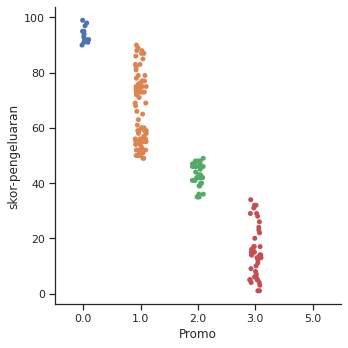

In [ ]:
sns.catplot(x='Promo',y='skor-pengeluaran',data=df)

Dari hasil visualisasi tersebut, terlihat bahwa banyak orang yang memiliki skor pengeluaran tinggi tidak menggunakan promo.

asumsi kami hal tersebut terjadi karena kurang sosialisasi pegawai kepada customer terkait adanya promo, kurangnya publikasi promo.

# D. Clustering

In [ ]:
Scaling_Columns = ['Umur','Pendapatan-per-bulan','skor-pengeluaran']

In [ ]:
df[Scaling_Columns].head()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,49.0,13114754.0,52
1,32.0,33606557.0,86
2,51.0,15983606.0,41
3,19.0,12704918.0,55
4,38.0,20081967.0,42


In [ ]:
scaler1 = MinMaxScaler()

df[Scaling_Columns] = scaler1.fit_transform(df[Scaling_Columns])

In [ ]:
print(df[Scaling_Columns].describe().T[['min','max']])

                      min  max
Umur                  0.0  1.0
Pendapatan-per-bulan  0.0  1.0
skor-pengeluaran      0.0  1.0


In [ ]:
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,0.738095,0.262295,0.520408,1,Jakarta,1.0,Sabtu,2
1,Wanita,0.333333,0.672131,0.867347,1,Depok,1.0,Minggu,6
2,Pria,0.785714,0.319672,0.408163,1,Jakarta,2.0,Minggu,3
3,Pria,0.023810,0.254098,0.551020,0,Jakarta,1.0,Rabu,7
4,Wanita,0.476190,0.401639,0.418367,1,Jakarta,2.0,Senin,8


## 1. Model 1 - Clustering Dengan Data Numerik

In [ ]:
Xnumerik = df[['Umur','Pendapatan-per-bulan','skor-pengeluaran']]
Xnumerik.head()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
0,0.738095,0.262295,0.520408
1,0.333333,0.672131,0.867347
2,0.785714,0.319672,0.408163
3,0.023810,0.254098,0.551020
4,0.476190,0.401639,0.418367


Text(0.5, 1.0, 'Elbow curve')

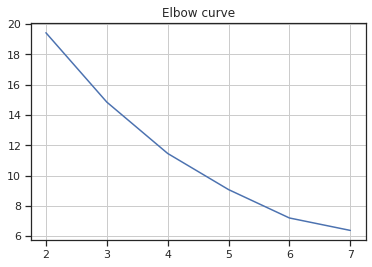

In [ ]:
distorsions, k1, kN = [], 2, 8
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(Xnumerik)
    distorsions.append(kmeans.inertia_)

plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

### Clustering dengan 3 centroid

array([1, 0, 1, 2, 1, 0, 2, 2, 2, 2], dtype=int32)

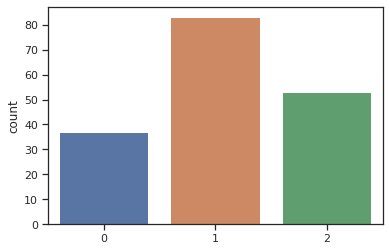

In [ ]:
k=3
kmPP1 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP1.fit(Xnumerik)
C_kmpp1 = kmPP1.predict(Xnumerik)

sns.countplot(x=C_kmpp1)
C_kmpp1[:10]

### Clustering dengan 4 centroid

array([2, 1, 2, 3, 2, 1, 3, 3, 3, 3], dtype=int32)

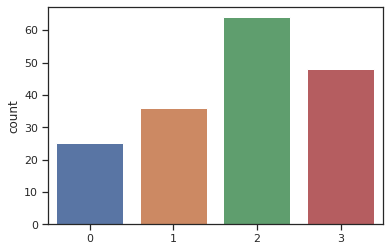

In [ ]:
k=4
kmPP2 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP2.fit(Xnumerik)
C_kmpp2 = kmPP2.predict(Xnumerik)

sns.countplot(x=C_kmpp2)
C_kmpp2[:10]

### Clustering dengan 5 centroid

array([1, 2, 1, 3, 1, 2, 3, 4, 3, 3], dtype=int32)

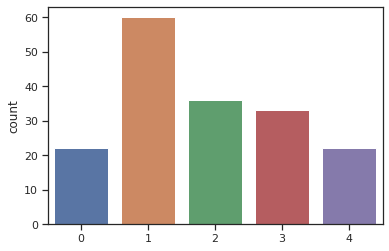

In [ ]:
k=5
kmPP3 = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP3.fit(Xnumerik)
C_kmpp3 = kmPP3.predict(Xnumerik)

sns.countplot(x=C_kmpp3)
C_kmpp3[:10]

### Evaluasi Internal dan Visualisasi

In [ ]:
#Evaluasi Internal : Silhoutte Coefficient
Hasil_Clustering = [C_kmpp1, C_kmpp2, C_kmpp3]
for res in Hasil_Clustering:
    print(siluet(Xnumerik,res), end=', ')

0.3868391384680439, 0.398542237843556, 0.4206471274418054, 

In [ ]:
#Evaluasi Internal : Inertia
kmPP1.inertia_ , kmPP2.inertia_, kmPP3.inertia_

(14.868596816746633, 11.424612529971453, 9.079150324935263)

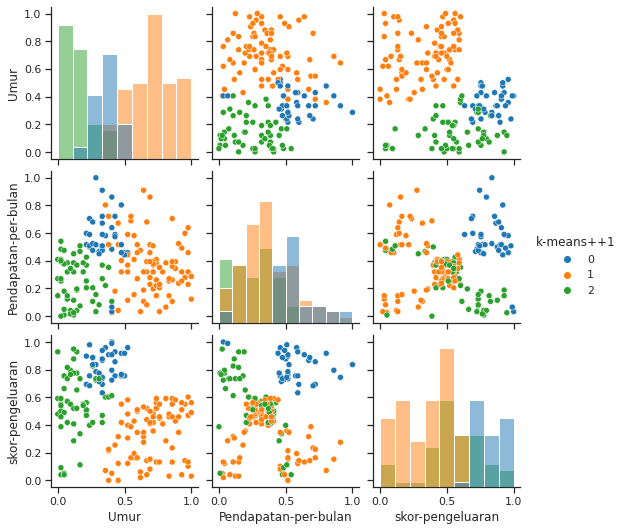

In [ ]:
df['k-means++1'] = C_kmpp1
kolom = ['Umur','Pendapatan-per-bulan','skor-pengeluaran','k-means++1']
g = sns.pairplot(df[kolom], \
                 hue="k-means++1", diag_kind="hist", palette="tab10")

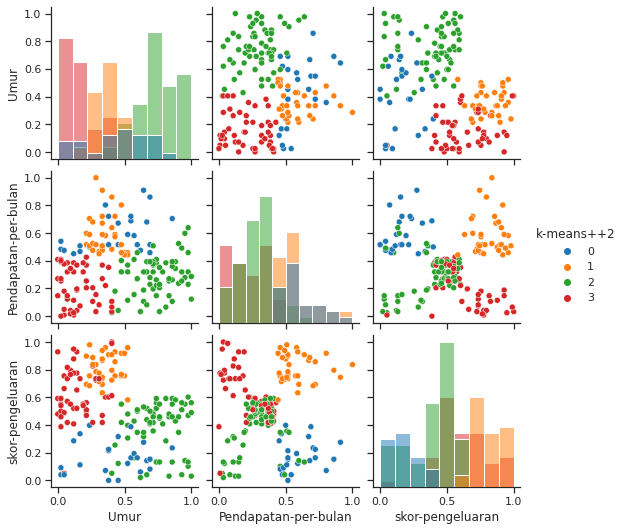

In [ ]:
df['k-means++2'] = C_kmpp2
kolom = ['Umur','Pendapatan-per-bulan','skor-pengeluaran','k-means++2']
g = sns.pairplot(df[kolom], \
                 hue="k-means++2", diag_kind="hist", palette="tab10")

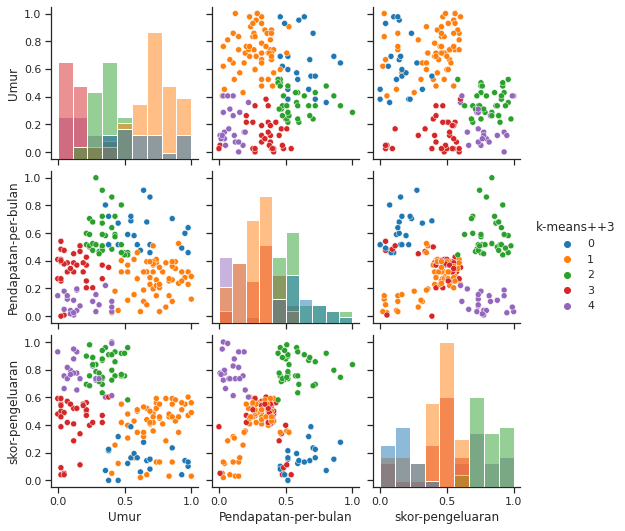

In [ ]:
df['k-means++3'] = C_kmpp3
kolom = ['Umur','Pendapatan-per-bulan','skor-pengeluaran','k-means++3']
g = sns.pairplot(df[kolom], \
                 hue="k-means++3", diag_kind="hist", palette="tab10")

### Interpretasi
Kami memilih dengan model 3 centroid untuk cluster yang paling baik mewakili customer segmentation berdasarkan Umur, Pendapatan per bulan, dan skor pengeluaran.

## 2. Model 2 - Clustering Dengan Data Numerik dan Kategorik

In [ ]:
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor,k-means++1,k-means++2,k-means++3
0,Wanita,0.738095,0.262295,0.520408,1,Jakarta,1.0,Sabtu,2,1,2,1
1,Wanita,0.333333,0.672131,0.867347,1,Depok,1.0,Minggu,6,0,1,2
2,Pria,0.785714,0.319672,0.408163,1,Jakarta,2.0,Minggu,3,1,2,1
3,Pria,0.023810,0.254098,0.551020,0,Jakarta,1.0,Rabu,7,2,3,3
4,Wanita,0.476190,0.401639,0.418367,1,Jakarta,2.0,Senin,8,1,2,1


In [ ]:
Xcampur = df[['Jenis Kelamin','Umur','Pendapatan-per-bulan','skor-pengeluaran','Menikah','Promo','FavFlavor']]
Xcampur.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,FavFlavor
0,Wanita,0.738095,0.262295,0.520408,1,1.0,2
1,Wanita,0.333333,0.672131,0.867347,1,1.0,6
2,Pria,0.785714,0.319672,0.408163,1,2.0,3
3,Pria,0.023810,0.254098,0.551020,0,1.0,7
4,Wanita,0.476190,0.401639,0.418367,1,2.0,8


In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5


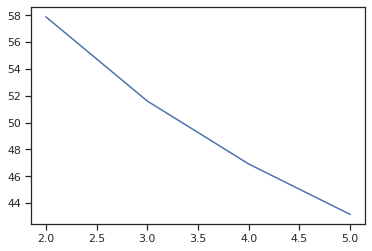

In [ ]:
from kmodes.kprototypes import KPrototypes

# Choose optimal K using Elbow method
cost = []
for cluster in range(2, 6):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(Xcampur, categorical = [0,4,5,6])
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

plt.plot(range(2, 6),cost)

### Clustering Dengan 2 Centroids

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 45, ncost: 60.670139480678365
Run: 1, iteration: 2/100, moves: 24, ncost: 58.101694642336234
Run: 1, iteration: 3/100, moves: 13, ncost: 57.88269437400374
Run: 1, iteration: 4/100, moves: 0, ncost: 57.88269437400374
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 45, ncost: 60.670139480678365
Run: 1, iteration: 2/100, moves: 24, ncost: 58.101694642336234
Run: 1, iteration: 3/100, moves: 13, ncost: 57.88269437400374
Run: 1, iteration: 4/100, moves: 0, ncost: 57.88269437400374


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

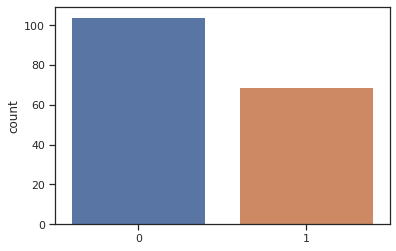

In [ ]:
k=2
kPro1 = KPrototypes(n_clusters=k, init='Huang', n_init=1, verbose=True, random_state=random_state)

kPro1.fit(Xcampur, categorical=[0,4,5,6])

C_kPro1 = kPro1.fit_predict(Xcampur, categorical=[0,4,5,6])

sns.countplot(x=C_kPro1)
C_kPro1[:10]

In [ ]:
kPro1.cluster_centroids_

array([['0.3090659340659343', '0.37034992807692296',
        '0.6568877551020407', 'Wanita', '1', '1.0', '0'],
       ['0.6790890269151134', '0.3768115849275362', '0.2861579414374443',
        'Pria', '1', '3.0', '1']], dtype='<U32')

### Clustering Dengan 3 Centroids

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 38, ncost: 54.36457250494548
Run: 1, iteration: 2/100, moves: 25, ncost: 53.19183132926136
Run: 1, iteration: 3/100, moves: 5, ncost: 53.12420200277673
Run: 1, iteration: 4/100, moves: 6, ncost: 52.90217033366541
Run: 1, iteration: 5/100, moves: 3, ncost: 52.87802624023142
Run: 1, iteration: 6/100, moves: 0, ncost: 52.87802624023142
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 38, ncost: 54.36457250494548
Run: 1, iteration: 2/100, moves: 25, ncost: 53.19183132926136
Run: 1, iteration: 3/100, moves: 5, ncost: 53.12420200277673
Run: 1, iteration: 4/100, moves: 6, ncost: 52.90217033366541
Run: 1, iteration: 5/100, moves: 3, ncost: 52.87802624023142
Run: 1, iteration: 6/100, moves: 0, ncost: 52.87802624023142


array([0, 0, 1, 2, 0, 2, 2, 2, 0, 0], dtype=uint16)

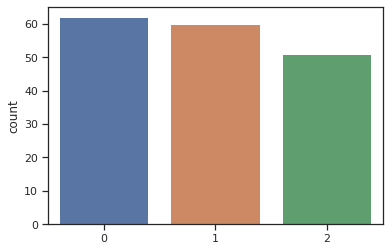

In [ ]:
k=3
kPro2 = KPrototypes(n_clusters=k, init='Huang', n_init=1, verbose=True, random_state=random_state)

kPro2.fit(Xcampur, categorical=[0,4,5,6])

C_kPro2 = kPro2.fit_predict(Xcampur, categorical=[0,4,5,6])

sns.countplot(x=C_kPro2)
C_kPro2[:10]

In [ ]:
kPro2.cluster_centroids_

array([['0.4696620583717358', '0.39000527999999984',
        '0.5771889400921656', 'Wanita', '1', '1.0', '8'],
       ['0.6428571428571422', '0.3831967116666667',
        '0.24115646258503373', 'Pria', '1', '3.0', '1'],
       ['0.22175536881419233', '0.34008356509803916',
        '0.7412965186074427', 'Pria', '1', '1.0', '0']], dtype='<U32')

### Clustering Dengan 4 Centroids

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 39, ncost: 49.47999373134546
Run: 1, iteration: 2/100, moves: 16, ncost: 48.87694917157065
Run: 1, iteration: 3/100, moves: 10, ncost: 47.85222928375873
Run: 1, iteration: 4/100, moves: 12, ncost: 47.513357405788646
Run: 1, iteration: 5/100, moves: 3, ncost: 47.14925119160716
Run: 1, iteration: 6/100, moves: 3, ncost: 47.101707882468425
Run: 1, iteration: 7/100, moves: 1, ncost: 47.09316158605914
Run: 1, iteration: 8/100, moves: 0, ncost: 47.09316158605914
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 39, ncost: 49.47999373134546
Run: 1, iteration: 2/100, moves: 16, ncost: 48.87694917157065
Run: 1, iteration: 3/100, moves: 10, ncost: 47.85222928375873
Run: 1, iteration: 4/100, moves: 12, ncost: 47.513357405788646
Run: 1, iteration: 5/100, moves: 3, ncost: 47.14925119160716
Run: 1, iteration: 6/100, moves: 3, 

array([2, 2, 1, 3, 0, 2, 3, 2, 2, 2], dtype=uint16)

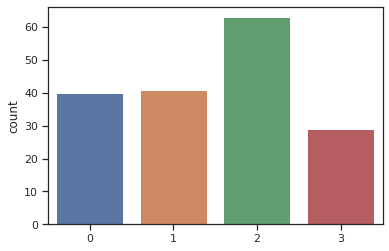

In [ ]:
k=4
kPro3 = KPrototypes(n_clusters=k, init='Huang', n_init=1, verbose=True, random_state=random_state)

kPro3.fit(Xcampur, categorical=[0,4,5,6])

C_kPro3 = kPro3.fit_predict(Xcampur, categorical=[0,4,5,6])

sns.countplot(x=C_kPro3)
C_kPro3[:10]

In [ ]:
kPro3.cluster_centroids_

array([['0.4845238095238093', '0.42684425250000013',
        '0.19566326530612244', 'Wanita', '1', '3.0', '1'],
       ['0.7938443670150984', '0.32047180292682903',
        '0.4076655052264809', 'Pria', '1', '2.0', '1'],
       ['0.3851095993953138', '0.413869363809524', '0.7345319080012959',
        'Wanita', '1', '1.0', '0'],
       ['0.09688013136288998', '0.283776135862069', '0.5946516537649539',
        'Pria', '0', '1.0', '5']], dtype='<U32')

Visualisasi

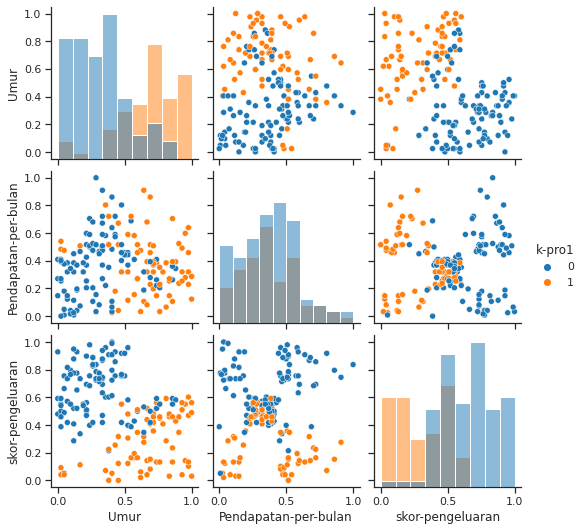

In [ ]:
df['k-pro1'] = C_kPro1
kolom = ['Jenis Kelamin','Umur','Pendapatan-per-bulan','skor-pengeluaran','Menikah','Promo','FavFlavor','k-pro1']
g = sns.pairplot(df[kolom], hue="k-pro1", diag_kind="hist", palette="tab10")

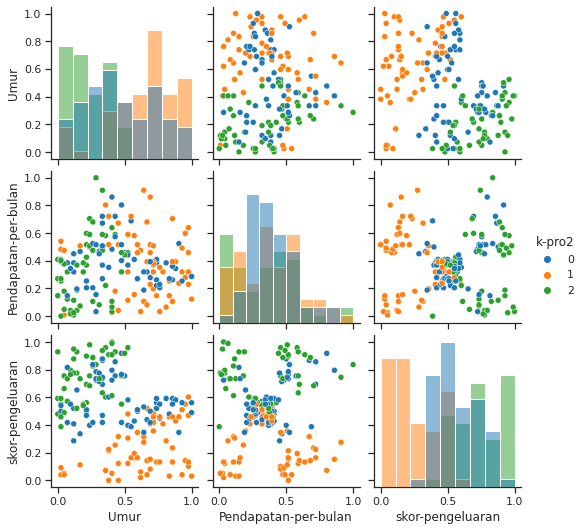

In [ ]:
df['k-pro2'] = C_kPro2
kolom = ['Jenis Kelamin','Umur','Pendapatan-per-bulan','skor-pengeluaran','Menikah','Promo','FavFlavor','k-pro2']
g = sns.pairplot(df[kolom], \
                 hue="k-pro2", diag_kind="hist", palette="tab10")

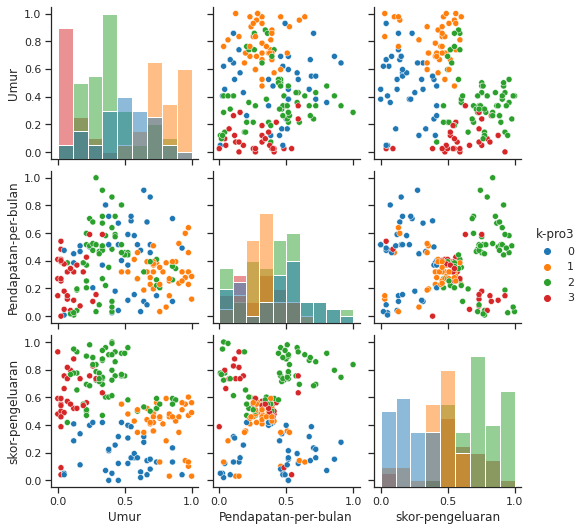

In [ ]:
df['k-pro3'] = C_kPro3
kolom = ['Jenis Kelamin','Umur','Pendapatan-per-bulan','skor-pengeluaran','Menikah','Promo','FavFlavor','k-pro3']
g = sns.pairplot(df[kolom], \
                 hue="k-pro3", diag_kind="hist", palette="tab10")

### Interpretasi
Dengan menggunakan data yang lengkap yaitu data numerik dan kategorik kami memilih model clustering dengan 3 centroid yang mewakili customer segmentation

# E. Kesimpulan

## 1. Kualitas Data

Kualitas data yang dimiliki oleh MixITUp:
1. Pada data MixITUp, terdapat beberapa missing value pada data, sehingga baris-baris yang terdapat missing value kami hapus, karena tidak ada interpretasi yang bisa diberikan dari missing value tersebut. Selain itu, karena missing value yang ada tidak terlalu banyak, sehingga kami memutuskan untuk menghapus baris-baris yang terdapat missing-value.

2. Pada data ini juga terdapat beberapa data yang salah ketik, seperti "JJakarta" dan "35'". Untuk data "JJakarta", kami memutuskan untuk mengganti menjadi "Jakarta". Kami tidak menghapus data tersebut karena masih terdapat interpretasi yang dapat diberikan. Untuk data "35'", kami memutuskan untuk menghapus baris data tersebut, karena pada baris tersebut juga terdapat missing value.

3. Pada data ini juga terdapat beberapa data noise, seperti angka "9" pada data FavFlavour, padahal data FavFlavour hanya sampai 8. Data noise lainnya adalah skor "101" pada Skor Pengeluaran, padahal data Skor Pengeluaran hanya sampai 100. Lalu, data noise selanjutnya adalah angka "5" pada Promo, padahal data Promo hanya samapai 3. Terakhir, terdapat data "-" pada data Jenis Kelamin dan Menikah. Kami memutuskan untuk menghapus baris dari data-data noise tersebut, karena data noise tersebut tidak bisa diinterpretasi.

4. Tidak ada keterangan pada data FavFlavor nomor 2, padahal banyak responden yang memilih nomor 2, sehingga data MixITUp ini tidak lengkap

## 2. Saran Perbaikan

Saran Kepada Data Engineer Mengenai Kualitas data:

1. Disarankan kepada data engineering untuk lain kali tidak menyimpan data di excel melainkan menyimpannya di csv. Hal ini dikarenakan mempermudah pengerjaan data analyst dalam memproses data serta untuk mengantisipasi scale up business. Hal ini penting dikarenakan excel memiliki kelemahan fatal yaitu memiliki jumlah baris yang terbatas sehingga jika tetap menggunakan excel saat member loyalty programnya semakin banyak maka terdapat kemungkinan beberapa data pelanggan tersebut dapat terhapus.

2. Disarankan kepada data engineering untuk lebih teliti dalam mengecek kelengkapan data, karena masih terdapat data tidak lengkap yang sangat berpengaruh terhadap hasil data.

## 3. Insight data dan saran marketing

Insight dan saran marketing:
1. Hari paling banyak penjualan es krim adalah hari Senin. Hal tersebut dapat diasumsikan karena hari produktif bekerja dimulai pada hari Senin yang menyebabkan orang-orang berada dalam keadaan yang lebih stres daripada biasanya dan menyebabkan mereka ingin untuk membeli makanan-makanan manis untuk meningkatkan mood dan menyemangati aktivitas mereka. Kami merekomendasikan pelayanan dari Mixitup dapat ditingkatkan pada hari Senin dengan memperbanyak staf-staf yang berjaga pada booth-booth Mixitup agar semua pelanggan setia mixitup dapat dipastikan mendapatkan pelayanan terbaik sehingga mereka akan loyal dan semakin yakin untuk memperpanjang kartu mempership.

2. Pembeli paling banyak adalah dari kalangan yang sudah menikah. Oleh karena itu, promo-promo yang akan diberikan oleh mixitup ke depannya dapat berupa promo 'couple' yang menargetkan khusus pasangan-pasangan yang sudah menikah untuk meningkatkan dan memfokuskan penjualan mereka di kalangan orang-orang yang sudah menikah dan teman-temannya.

3. Rasa es krim yang paling banyak dijual adalah rasa Vanilla. Hal tersebut bisa saja disebabkan karena rasa vanilla merupakan rasa yang paling general dan telah dikenal banyak di kalangan masyarakat. Sedangkan flavor-flavor lain kurang laku (seperti rasa kelapa) dikarenakan masyarakat kita belum terlalu familiar dengan rasa-rasa tersebut. Direkomendasikan kepada mixitup untuk turut mempromosikan flavor-flavor eskrim lainnya ke pelanggan untuk meningkatkan penjualan. Promosi dapat dilakukan seperti: "beli 5 es krim vanila secara berturut-turut dan dapatkan gratis es krim rasa kelapa" agar lebih banyak orang memiliki lidah yang familiar dengan es krim rasa kelapa.

4. Buka cabang baru di Jakarta dengan penjualan terbanyak; karena daerah tersebut memiliki prospek yang menjanjikan sehingga boleh saja untuk memfokuskan marketing dan iklan di daerah tersebut. Namun juga bisa mempertimbangkan untuk membuka cabang di kota dengan penjualan yang kurang (kota Tangerang) karena mungkin sebenarnya potensi penjualan franchise di kota tersebut bagus (e.g. biaya sewa toko yang murah, etc) namun penjualan sedikit kurang karena daerah tersebut kurang “terpantau” sehingga perlu diperhatikan secara intensif dengan memperbanyak membuka cabang di daerah 'tersebut'; sementara di kota yang penjualannya sudah banyak bermakna sistem penjualan yang dieksekusi di kota Jakarta sudah berjalan dengan baik. Jika mixitup ingin membuka cabang di kota baru selain dari kota tangerang, jakarta, dan depok. Disarankan untuk fokus membuka cabang baru didalam pulau Jawa juga, karena dari visualisasi yang diberikan, penjualan didalam ranah jakarta, tangerang, dan depok cukup menjanjikan.

5. Berdasarkan penyelidikan tim data saintis kami, kami menemukan bahwa justru skor promo tidak berkorelasi kuat dengan skor-pengeluaran. Padahal secara teori, seharusnya semakin sering seseorang menggunakan promo (skor promo besar), maka semakin besar juga pengeluaran seseorang. Direkomendasikan kepada mixitup untuk melakukan penyelidikan lebih lanjut yang menyebabkan fenomena unik ini di kalangan pelanggannya. Karena bisa saja promo-promo yang diberikan mixitup kurang menarik sehingga tidak memengaruhi skor-pengeluaran pelanggan-pelanggannya atau kurang publikasi/iklan sehingga promo-promo yang diberikan kurang terjangkau dan tidak diketahui oleh kalangan pembeli.